In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from tensorflow.keras.datasets.cifar10 import load_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


In [4]:
# https://www.cs.toronto.edu/~kriz/cifar.html
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(train_x_orig, train_y), (test_x_orig, test_y) = load_data()

170500096/170498071 [==============================] - 167s 1us/step


50000 50000 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
train_y[index][0] 9
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y = 9. It's a truck picture.


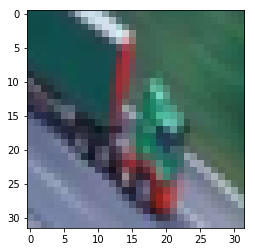

In [13]:
# Example of a picture
index = 50
plt.imshow(train_x_orig[index])
print(len(train_x_orig), len(train_y), train_y)
print('train_y[index][0]', train_y[index][0])
print(classes)
print ("y = " + str(train_y[index][0]) + ". It's a " + classes[train_y[index][0]] + " picture.")

In [14]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 50000
Number of testing examples: 10000
Each image is of size: (32, 32, 3)
train_x_orig shape: (50000, 32, 32, 3)
train_y shape: (50000, 1)
test_x_orig shape: (10000, 32, 32, 3)
test_y shape: (10000, 1)


In [15]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (3072, 50000)
test_x's shape: (3072, 10000)


In [16]:
### CONSTANTS DEFINING THE MODEL ####
# https://www.samyzaf.com/ML/cifar10/cifar10.html
# The CIFAR-10 dataset consists of 60000 32x32x3 color images in 10 equal classes, (6000 images per class)
n_x = 32 * 32 * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [19]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        ###
        if print_cost and i < 3:
            print()
            print("iteration {}".format(i))
            print('W1, W2', W1, W2)
            print('b1, b2', b1, b2)
            print('A1, A2', A1, A2)
        ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        ###
        if print_cost and i < 3:
            print('cost', cost)
        ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        if print_cost and i < 3:
            print('dA2', dA2)
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        if print_cost and i < 3:
            print('dA1, dW2, db2', dA1, dW2, db2)
            print('dA0, dW1, db1', dA0, dW1, db1)
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i < 3:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [21]:
# GRADED FUNCTION: three_layer_model

def three_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, W3, b1, b2 and b3
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'relu')
        A3, cache3 = linear_activation_forward(A2, W3, b3, 'sigmoid')
        ### END CODE HERE ###
        
        ###
        if print_cost and i < 3:
            print()
            print("iteration {}".format(i))
            print('W1, W2, W3', W1, W2, W3)
            print('b1, b2, b3', b1, b2, b3)
            print('A1, A2, A3', A1, A2, A3)
        ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A3, Y)
        #cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        ###
        if print_cost and i < 3:
            print('cost', cost)
        ###
        
        # Initializing backward propagation
        dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
#         dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        if print_cost and i < 3:
            print('dA3', dA3)
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA2, dW3, db3 = linear_activation_backward(dA3, cache3, 'sigmoid')
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'relu')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        if print_cost and i < 3:
            print('dA2, dW3, db3', dA2, dW3, db3)
            print('dA1, dW2, db2', dA1, dW2, db2)
            print('dA0, dW1, db1', dA0, dW1, db1)
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW3'] = dW3
        grads['db3'] = db3
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
        
        # Print the cost every 100 training example
        if print_cost and i < 3:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [22]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 10, print_cost=True)
print(parameters)


iteration 0
W1, W2 [[ 0.01624345 -0.00611756 -0.00528172 ...  0.01207317  0.01377667
   0.00636284]
 [ 0.00055297  0.00405817  0.01248457 ... -0.01951761  0.00212729
   0.00108224]
 [ 0.00131307 -0.01363814  0.00239215 ... -0.00678362 -0.01135211
   0.00050318]
 ...
 [ 0.01009231  0.00229889 -0.00664099 ... -0.01057715  0.0050263
   0.00554066]
 [-0.00908842 -0.01518325 -0.00132815 ... -0.00356188  0.00250796
   0.00541891]
 [-0.00195132 -0.0134674  -0.00570327 ...  0.00961913  0.00877438
   0.01493611]] [[-0.003477   -0.00514324 -0.00085924 -0.0114153   0.00056509  0.00261963
   0.00617491]]
b1, b2 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [[0.]]
A1, A2 [[0.3104337  0.31851562 0.5136688  ... 0.51513792 0.59188517 0.49182025]
 [0.02115502 0.09622938 0.         ... 0.         0.05450168 0.        ]
 [0.40891575 0.01099054 0.         ... 0.         0.         0.18153547]
 ...
 [0.35653334 0.23111246 0.         ... 0.         0.         0.26021737]
 [0.         0.13805693 0.         ...

MemoryError: 

In [ ]:
parameters = three_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 10, print_cost=True)
print(parameters)